In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# from sklearn.metrics._classification import _nanaverage

def naive_bayes_search(df1, df2,seed_value=22):
    X_train, X_test, Y_train, Y_test = train_test_split(df1, df2, test_size=0.3,random_state=seed_value)
    
    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    
    predicted = gnb.predict(X_test)
    predicted_probs = gnb.predict_proba(X_test)
    
    # cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
    # print("Cross-Validation Scores:", cross_val_scores)
    # print("Mean CV Score:", cross_val_scores.mean())


    # train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
    # train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = np.mean(test_scores, axis=1)

    # plt.figure()
    # plt.title("Learning Curves")
    # plt.xlabel("Training examples")
    # plt.ylabel("Score")
    # plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    # plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    # plt.legend(loc="best")
    # plt.show()

    accuracy = accuracy_score(Y_test,predicted )
    f1 = f1_score(predicted, Y_test, average="weighted")
    conf_matrix = confusion_matrix(predicted, Y_test)
    precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
    recall = recall_score(Y_test, predicted, average="weighted")
    # roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
    conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
    tp = conf_matrices[:,1,1]
    fp = conf_matrices[:,0,1]
    tn = conf_matrices[:,0,0]
    fn = conf_matrices[:,1,0]
    # fpr = _nanaverage(fp/(tn + fp), tp + fn)
    # tnr = _nanaverage(tn/(tn + fp), tp + fn)

    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    # print("Specificity:", tnr)
    # print("False Positive Rate:", fpr)
    # print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)

    return predicted





In [2]:
import pandas as pd
merged_data = pd.read_csv('processed_df.csv')
# merged_data=pd.read_csv('Dataset/x_train_all.csv')
ytrainall = pd.read_csv('Dataset/y_train_all.csv')
merged_data = pd.concat([merged_data,ytrainall],axis = 1)
merged_data=merged_data.rename(columns={merged_data.columns[-1]:'label'})
# merged_data=merged_data.rename(columns={merged_data.columns[0]:'labels'})
# merged_data=merged_data.drop(columns =['labels'])
merged_data.columns.values[0] = '0'

In [3]:
merged_data.head()


,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0


In [4]:
from sklearn.svm import SVC

x = merged_data.drop('label',axis=1)
y = merged_data['label']

svm = SVC(kernel='linear', decision_function_shape='ovr')

svm.fit(x, y)

SVC(kernel='linear')

In [5]:
feature_weights = svm.coef_


In [6]:
import numpy as np
k = 20
selected_features_per_class = {}
for class_label in range(10): 
    feature_ranking = np.argsort(np.abs(feature_weights[class_label]))
    selected_features = feature_ranking[:k]
    selected_features_per_class[class_label] = selected_features

print(selected_features_per_class)

{0: array([1605,  490, 1536,  927,  742, 1966, 2066, 2235,  239, 1869, 1941,
       1264, 2090, 1815, 1766,  661, 2122,  409, 1497,  628], dtype=int64), 1: array([1432,   52, 1733,  637, 1262,  829, 1388,  280,  635, 1423,  702,
       2221, 1773, 1868,  739,  828, 2022, 1876, 1609, 1377], dtype=int64), 2: array([1997,  166,  335, 1765, 1780,  845,  281,  638, 1561,  148,  510,
        487,  537, 2293, 1699, 1023,  136,  284, 1185,  391], dtype=int64), 3: array([1772,  481,  670, 1212, 2245, 1465, 2023, 2246, 1389,  274, 1164,
       1243,  777, 2204, 2156,  684, 1677,  314, 2011,  541], dtype=int64), 4: array([1676, 2039, 2051,  581, 2272,  491, 1677, 1674, 1921, 1148,  486,
        348,  910, 2182,  470, 1474, 1103,  921, 2066,    7], dtype=int64), 5: array([ 464,   74, 1739, 1361, 1756,  445, 1874, 1928,  774,   58, 1998,
       1921, 1617, 1865, 1018, 1909,  811, 1056, 2054,  615], dtype=int64), 6: array([2216, 1948, 1778,  966,  935, 1063,  963,  956,  830,  374,  574,
        965

In [7]:
# xtrain = pd.read_csv('processed_df.csv')
xtrain = pd.read_csv('Dataset/x_train_all.csv')
# xtrain = xtrain.rename(columns={xtrain.columns[0]:'labels'})
# xtrain = xtrain.drop(columns=['labels'])
ytrain0 = pd.read_csv('y_train_0.csv')
ytrain3 = pd.read_csv('y_train_3.csv')
ytrain1 = pd.read_csv('y_train_1.csv')
ytrain2 = pd.read_csv('y_train_2.csv')
ytrain4 = pd.read_csv('y_train_4.csv')
ytrain5 = pd.read_csv('y_train_5.csv')
ytrain6 = pd.read_csv('y_train_6.csv')
ytrain7 = pd.read_csv('y_train_7.csv')
ytrain8 = pd.read_csv('y_train_8.csv')
ytrain9 = pd.read_csv('y_train_9.csv')

In [8]:
xtrain.head()


,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [9]:
xy0_20 = None
for i in selected_features_per_class[0]:
    xy0_20 = pd.concat([xy0_20,xtrain.iloc[:,int(i)]],axis=1)
xy0_20 = pd.concat([xy0_20,ytrain0],axis=1)
xy0_20 = xy0_20.rename(columns={xy0_20.columns[-1]:'label'})
print(xy0_20)
    
xy1_20 = None
for i in selected_features_per_class[1]:
    xy1_20 = pd.concat([xy1_20,xtrain.iloc[:,int(i)]],axis=1)
xy1_20 = pd.concat([xy1_20,ytrain1],axis=1)
xy1_20 = xy1_20.rename(columns={xy1_20.columns[-1]:'label'})
print(xy1_20)

xy2_20 = None
for i in selected_features_per_class[2]:
    xy2_20 = pd.concat([xy2_20,xtrain.iloc[:,int(i)]],axis=1)
xy2_20 = pd.concat([xy2_20,ytrain2],axis=1)
xy2_20 = xy2_20.rename(columns={xy2_20.columns[-1]:'label'})
print(xy2_20)

xy3_20 = None
for i in selected_features_per_class[3]:
    xy3_20 = pd.concat([xy3_20,xtrain.iloc[:,int(i)]],axis=1)
xy3_20 = pd.concat([xy3_20,ytrain3],axis=1)
xy3_20 = xy3_20.rename(columns={xy3_20.columns[-1]:'label'})
print(xy3_20)

xy4_20 = None
for i in selected_features_per_class[4]:
    xy4_20 = pd.concat([xy4_20,xtrain.iloc[:,int(i)]],axis=1)
xy4_20 = pd.concat([xy4_20,ytrain4],axis=1)
xy4_20 = xy4_20.rename(columns={xy4_20.columns[-1]:'label'})
print(xy4_20)

xy5_20 = None
for i in selected_features_per_class[5]:
    xy5_20 = pd.concat([xy5_20,xtrain.iloc[:,int(i)]],axis=1)
xy5_20 = pd.concat([xy5_20,ytrain5],axis=1)
xy5_20 = xy5_20.rename(columns={xy5_20.columns[-1]:'label'})
print(xy5_20)

xy6_20 = None
for i in selected_features_per_class[6]:
    xy6_20 = pd.concat([xy6_20,xtrain.iloc[:,int(i)]],axis=1)
xy6_20 = pd.concat([xy6_20,ytrain6],axis=1)
xy6_20 = xy6_20.rename(columns={xy6_20.columns[-1]:'label'})
print(xy6_20)

xy7_20 = None
for i in selected_features_per_class[7]:
    xy7_20 = pd.concat([xy7_20,xtrain.iloc[:,int(i)]],axis=1)
xy7_20 = pd.concat([xy7_20,ytrain7],axis=1)
xy7_20 = xy7_20.rename(columns={xy7_20.columns[-1]:'label'})
print(xy7_20)

xy8_20 = None
for i in selected_features_per_class[8]:
    xy8_20 = pd.concat([xy8_20,xtrain.iloc[:,int(i)]],axis=1)
xy8_20 = pd.concat([xy8_20,ytrain8],axis=1)
xy8_20 = xy8_20.rename(columns={xy8_20.columns[-1]:'label'})
print(xy8_20)

xy9_20 = None
for i in selected_features_per_class[9]:
    xy9_20 = pd.concat([xy9_20,xtrain.iloc[:,int(i)]],axis=1)
xy9_20 = pd.concat([xy9_20,ytrain9],axis=1)
xy9_20 = xy9_20.rename(columns={xy9_20.columns[-1]:'label'})
print(xy9_20)

    


       1605    490   1536    927    742  1966   2066   2235    239  1869  ...  \
0     219.0   83.0  184.0  105.0  103.0  82.0  126.0   98.0   77.0  79.0  ...   
1     185.0   97.0  187.0   80.0  123.0  80.0  136.0  125.0   71.0  79.0  ...   
2     204.0  129.0  182.0  110.0  196.0  76.0  124.0  109.0   68.0  79.0  ...   
3     185.0  148.0  184.0  135.0  235.0  77.0  128.0  111.0   64.0  80.0  ...   
4     175.0   80.0  107.0   81.0   78.0  77.0  153.0  119.0   83.0  75.0  ...   
...     ...    ...    ...    ...    ...   ...    ...    ...    ...   ...  ...   
9685   54.0  255.0  222.0  161.0   96.0  29.0   60.0   92.0   36.0  30.0  ...   
9686   55.0  255.0   92.0  104.0  104.0  29.0   38.0  100.0  122.0  36.0  ...   
9687   53.0  254.0  109.0   75.0  101.0  31.0   41.0   93.0   60.0  32.0  ...   
9688   53.0  255.0  113.0   86.0   94.0  23.0   38.0   91.0   33.0  27.0  ...   
9689   41.0  248.0  255.0   70.0   91.0  36.0   34.0   82.0  214.0  28.0  ...   

       1264   2090  1815   

In [10]:
xy0_10 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 10:
        break
    xy0_10 = pd.concat([xy0_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_10 = pd.concat([xy0_10,ytrain0],axis=1)
xy0_10 = xy0_10.rename(columns={xy0_10.columns[-1]:'label'})
print(xy0_10)
    
xy1_10 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 10:
        break
    xy1_10 = pd.concat([xy1_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_10 = pd.concat([xy1_10,ytrain1],axis=1)
xy1_10 = xy1_10.rename(columns={xy1_10.columns[-1]:'label'})
print(xy1_10)

xy2_10 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 10:
        break
    xy2_10 = pd.concat([xy2_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_10 = pd.concat([xy2_10,ytrain2],axis=1)
xy2_10 = xy2_10.rename(columns={xy2_10.columns[-1]:'label'})
print(xy2_10)

xy3_10 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 10:
        break
    xy3_10 = pd.concat([xy3_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_10 = pd.concat([xy3_10,ytrain3],axis=1)
xy3_10 = xy3_10.rename(columns={xy3_10.columns[-1]:'label'})
print(xy3_10)

xy4_10 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 10:
        break
    xy4_10 = pd.concat([xy4_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_10 = pd.concat([xy4_10,ytrain4],axis=1)
xy4_10 = xy4_10.rename(columns={xy4_10.columns[-1]:'label'})
print(xy4_10)

xy5_10 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 10:
        break
    xy5_10 = pd.concat([xy5_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_10 = pd.concat([xy5_10,ytrain5],axis=1)
xy5_10 = xy5_10.rename(columns={xy5_10.columns[-1]:'label'})
print(xy5_10)

xy6_10 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 10:
        break
    xy6_10 = pd.concat([xy6_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_10 = pd.concat([xy6_10,ytrain6],axis=1)
xy6_10 = xy6_10.rename(columns={xy6_10.columns[-1]:'label'})
print(xy6_10)

xy7_10 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 10:
        break
    xy7_10 = pd.concat([xy7_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_10 = pd.concat([xy7_10,ytrain7],axis=1)
xy7_10 = xy7_10.rename(columns={xy7_10.columns[-1]:'label'})
print(xy7_10)

xy8_10 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 10:
        break
    xy8_10 = pd.concat([xy8_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_10 = pd.concat([xy8_10,ytrain8],axis=1)
xy8_10 = xy8_10.rename(columns={xy8_10.columns[-1]:'label'})
print(xy8_10)

xy9_10 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 10:
        break
    xy9_10 = pd.concat([xy9_10,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_10 = pd.concat([xy9_10,ytrain9],axis=1)
xy9_10 = xy9_10.rename(columns={xy9_10.columns[-1]:'label'})
print(xy9_10)


       1605    490   1536    927    742  1966   2066   2235    239  1869  \
0     219.0   83.0  184.0  105.0  103.0  82.0  126.0   98.0   77.0  79.0   
1     185.0   97.0  187.0   80.0  123.0  80.0  136.0  125.0   71.0  79.0   
2     204.0  129.0  182.0  110.0  196.0  76.0  124.0  109.0   68.0  79.0   
3     185.0  148.0  184.0  135.0  235.0  77.0  128.0  111.0   64.0  80.0   
4     175.0   80.0  107.0   81.0   78.0  77.0  153.0  119.0   83.0  75.0   
...     ...    ...    ...    ...    ...   ...    ...    ...    ...   ...   
9685   54.0  255.0  222.0  161.0   96.0  29.0   60.0   92.0   36.0  30.0   
9686   55.0  255.0   92.0  104.0  104.0  29.0   38.0  100.0  122.0  36.0   
9687   53.0  254.0  109.0   75.0  101.0  31.0   41.0   93.0   60.0  32.0   
9688   53.0  255.0  113.0   86.0   94.0  23.0   38.0   91.0   33.0  27.0   
9689   41.0  248.0  255.0   70.0   91.0  36.0   34.0   82.0  214.0  28.0   

      label  
0         0  
1         0  
2         0  
3         0  
4         0  
...

In [11]:
xy0_5 = None
y=0
for i in selected_features_per_class[0]:
    if y >= 5:
        break
    xy0_5 = pd.concat([xy0_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy0_5 = pd.concat([xy0_5,ytrain0],axis=1)
xy0_5 = xy0_5.rename(columns={xy0_5.columns[-1]:'label'})
print(xy0_5)
    
xy1_5 = None
y=0
for i in selected_features_per_class[1]:
    if y >= 5:
        break
    xy1_5 = pd.concat([xy1_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy1_5 = pd.concat([xy1_5,ytrain1],axis=1)
xy1_5 = xy1_5.rename(columns={xy1_5.columns[-1]:'label'})
print(xy1_5)

xy2_5 = None
y=0
for i in selected_features_per_class[2]:
    if y >= 5:
        break
    xy2_5 = pd.concat([xy2_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy2_5 = pd.concat([xy2_5,ytrain2],axis=1)
xy2_5 = xy2_5.rename(columns={xy2_5.columns[-1]:'label'})
print(xy2_5)

xy3_5 = None
y=0
for i in selected_features_per_class[3]:
    if y >= 5:
        break
    xy3_5 = pd.concat([xy3_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy3_5 = pd.concat([xy3_5,ytrain3],axis=1)
xy3_5 = xy3_5.rename(columns={xy3_5.columns[-1]:'label'})
print(xy3_5)

xy4_5 = None
y=0
for i in selected_features_per_class[4]:
    if y >= 5:
        break
    xy4_5 = pd.concat([xy4_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy4_5 = pd.concat([xy4_5,ytrain4],axis=1)
xy4_5 = xy4_5.rename(columns={xy4_5.columns[-1]:'label'})
print(xy4_5)

xy5_5 = None
y=0
for i in selected_features_per_class[5]:
    if y >= 5:
        break
    xy5_5 = pd.concat([xy5_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy5_5 = pd.concat([xy5_5,ytrain5],axis=1)
xy5_5 = xy5_5.rename(columns={xy5_5.columns[-1]:'label'})
print(xy5_5)

xy6_5 = None
y=0
for i in selected_features_per_class[6]:
    if y >= 5:
        break
    xy6_5 = pd.concat([xy6_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy6_5 = pd.concat([xy6_5,ytrain6],axis=1)
xy6_5 = xy6_5.rename(columns={xy6_5.columns[-1]:'label'})
print(xy6_5)

xy7_5 = None
y=0
for i in selected_features_per_class[7]:
    if y >= 5:
        break
    xy7_5 = pd.concat([xy7_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy7_5 = pd.concat([xy7_5,ytrain7],axis=1)
xy7_5 = xy7_5.rename(columns={xy7_5.columns[-1]:'label'})
print(xy7_5)

xy8_5 = None
y=0
for i in selected_features_per_class[8]:
    if y >= 5:
        break
    xy8_5 = pd.concat([xy8_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy8_5 = pd.concat([xy8_5,ytrain8],axis=1)
xy8_5 = xy8_5.rename(columns={xy8_5.columns[-1]:'label'})
print(xy8_5)

xy9_5 = None
y=0
for i in selected_features_per_class[9]:
    if y >= 5:
        break
    xy9_5 = pd.concat([xy9_5,xtrain.iloc[:,int(i)]],axis=1)
    y+=1
xy9_5 = pd.concat([xy9_5,ytrain9],axis=1)
xy9_5 = xy9_5.rename(columns={xy9_5.columns[-1]:'label'})
print(xy9_5)


       1605    490   1536    927    742  label
0     219.0   83.0  184.0  105.0  103.0      0
1     185.0   97.0  187.0   80.0  123.0      0
2     204.0  129.0  182.0  110.0  196.0      0
3     185.0  148.0  184.0  135.0  235.0      0
4     175.0   80.0  107.0   81.0   78.0      0
...     ...    ...    ...    ...    ...    ...
9685   54.0  255.0  222.0  161.0   96.0      1
9686   55.0  255.0   92.0  104.0  104.0      1
9687   53.0  254.0  109.0   75.0  101.0      1
9688   53.0  255.0  113.0   86.0   94.0      1
9689   41.0  248.0  255.0   70.0   91.0      1

[9690 rows x 6 columns]
       1432     52   1733    637   1262  label
0      89.0   89.0   94.0  115.0  176.0      1
1      91.0   79.0  111.0  110.0  100.0      1
2      87.0   88.0  120.0  119.0  153.0      1
3      82.0   98.0  105.0  129.0  142.0      1
4     116.0   84.0  179.0  131.0  158.0      1
...     ...    ...    ...    ...    ...    ...
9685   42.0  199.0   43.0  255.0   20.0      1
9686   52.0  205.0   47.0  206.0   

In [12]:
y_train=xy0_5['label']
y_train

0       0
1       0
2       0
3       0
4       0
       ..
9685    1
9686    1
9687    1
9688    1
9689    1
Name: label, Length: 9690, dtype: int64

In [13]:
xy0_5

,1605,490,1536,927,742,label
0,219.0,83.0,184.0,105.0,103.0,0
1,185.0,97.0,187.0,80.0,123.0,0
2,204.0,129.0,182.0,110.0,196.0,0
3,185.0,148.0,184.0,135.0,235.0,0
4,175.0,80.0,107.0,81.0,78.0,0
...,...,...,...,...,...,...
9685,54.0,255.0,222.0,161.0,96.0,1
9686,55.0,255.0,92.0,104.0,104.0,1
9687,53.0,254.0,109.0,75.0,101.0,1
9688,53.0,255.0,113.0,86.0,94.0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

seed_value = 22
processed_df = xy9_20.drop(columns=['label'])
y_train = xy9_20['label']

X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3, random_state=seed_value)

gnb = GaussianNB()

gnb.fit(X_train, Y_train)

predicted = gnb.predict(X_test)

In [15]:
accuracy = accuracy_score(predicted, Y_test)
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9267285861713106
F1 Score: 0.9144435925616496
Confusion Matrix:
 [[  12  148]
 [  65 2682]]


In [16]:
y_train=xy0_5['label']
processed_df=xy0_5.drop(columns=['label'])
naive_bayes_search(processed_df,y_train)

Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [17]:
for i in range(10):
    strings=globals()["xy{}_5".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


The current Data frame is:  1
Accuracy: 0.7206742346061231
F1 Score: 0.7282272614049545
Precision: 0.7071068742350334
Recall/Sensitivity/True Positive Rate: 0.7206742346061231
Confusion Matrix:
 [[ 232  358]
 [ 454 1863]]


The current Data frame is:  2
Accuracy: 0.760921912624699
F1 Score: 0.8204924612426809
Precision: 0.696758798358478
Recall/Sensitivity/True Positive Rate: 0.760921912624699
Confusion Matrix:
 [[  68   99]
 [ 596 2144]]


The current Data frame is:  3
Accuracy: 0.8582731338149295
F1 Score: 0.8878519519945112
Precision: 0.8259810945105907
Recall/Sensitivity/True Positive Rate: 0.8582731338149295
Confusion Matrix:
 [[  80   72]
 [ 340 2415]]


The current Data frame is:  4
Accuracy: 0.6130030959752322
F1 Score: 0.5745084899556268
Precision: 0.76215630

In [18]:
for i in range(10):
    strings=globals()["xy{}_10".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.8885448916408669
F1 Score: 0.8546058025000232
Precision: 0.9648222903099499
Recall/Sensitivity/True Positive Rate: 0.8885448916408669
Confusion Matrix:
 [[  26  285]
 [  39 2557]]


The current Data frame is:  1
Accuracy: 0.6917784657722739
F1 Score: 0.6820846329363506
Precision: 0.7144587872674384
Recall/Sensitivity/True Positive Rate: 0.6917784657722739
Confusion Matrix:
 [[ 312  522]
 [ 374 1699]]


The current Data frame is:  2
Accuracy: 0.7351221190230478
F1 Score: 0.7448278768406621
Precision: 0.7182343362243369
Recall/Sensitivity/True Positive Rate: 0.7351221190230478
Confusion Matrix:
 [[ 219  325]
 [ 445 1918]]


The current Data frame is:  3
Accuracy: 0.7925696594427245
F1 Score: 0.7808256892588054
Precision: 0.8195796333773478
Recall/Sensitivity/True Positive Rate: 0.7925696594427245
Confusion Matrix:
 [[ 188  371]
 [ 232 2116]]


The current Data frame is:  4
Accuracy: 0.5366357069143447
F1 Score: 0.49532723738210094
Precision: 0.76

In [19]:
for i in range(10):
    strings=globals()["xy{}_20".format(i)]
    print("The current Data frame is: ",i)
    y_train=strings['label']
    processed_df=strings.drop(columns=['label'])
    naive_bayes_search(processed_df,y_train)
    print("\n")

The current Data frame is:  0
Accuracy: 0.8796009631922944
F1 Score: 0.840835167070912
Precision: 0.9713255757983613
Recall/Sensitivity/True Positive Rate: 0.8796009631922944
Confusion Matrix:
 [[  42  327]
 [  23 2515]]


The current Data frame is:  1
Accuracy: 0.6824905400756794
F1 Score: 0.6659160189027782
Precision: 0.7279689983916663
Recall/Sensitivity/True Positive Rate: 0.6824905400756794
Confusion Matrix:
 [[ 369  606]
 [ 317 1615]]


The current Data frame is:  2
Accuracy: 0.7003783969728242
F1 Score: 0.68695212853178
Precision: 0.7344234619779695
Recall/Sensitivity/True Positive Rate: 0.7003783969728242
Confusion Matrix:
 [[ 337  544]
 [ 327 1699]]


The current Data frame is:  3
Accuracy: 0.7296181630546955
F1 Score: 0.6925545518773143
Precision: 0.8519568209571109
Recall/Sensitivity/True Positive Rate: 0.7296181630546955
Confusion Matrix:
 [[ 310  676]
 [ 110 1811]]


The current Data frame is:  4
Accuracy: 0.52046783625731
F1 Score: 0.48000633242161717
Precision: 0.7679480

#### Victor 

In [20]:
features = []
for i in range(len(selected_features_per_class)):
    features.append(selected_features_per_class[i][0:20])
features = np.concatenate(features)
features = np.unique(features)
features = features.tolist()
for i in range(len(features)):
    features[i] = str(features[i])
features



['7',
 '41',
 '42',
 '52',
 '58',
 '71',
 '74',
 '115',
 '129',
 '136',
 '148',
 '166',
 '211',
 '213',
 '218',
 '237',
 '239',
 '274',
 '280',
 '281',
 '284',
 '314',
 '335',
 '338',
 '346',
 '348',
 '374',
 '375',
 '391',
 '409',
 '425',
 '445',
 '450',
 '461',
 '464',
 '470',
 '481',
 '483',
 '486',
 '487',
 '490',
 '491',
 '492',
 '510',
 '512',
 '531',
 '537',
 '541',
 '574',
 '581',
 '615',
 '628',
 '635',
 '637',
 '638',
 '646',
 '661',
 '670',
 '684',
 '702',
 '719',
 '739',
 '742',
 '774',
 '777',
 '798',
 '811',
 '828',
 '829',
 '830',
 '845',
 '850',
 '884',
 '910',
 '916',
 '917',
 '921',
 '927',
 '935',
 '956',
 '963',
 '965',
 '966',
 '967',
 '972',
 '1013',
 '1018',
 '1023',
 '1049',
 '1056',
 '1063',
 '1095',
 '1103',
 '1109',
 '1148',
 '1164',
 '1185',
 '1204',
 '1212',
 '1241',
 '1243',
 '1262',
 '1264',
 '1322',
 '1361',
 '1377',
 '1382',
 '1388',
 '1389',
 '1402',
 '1423',
 '1432',
 '1433',
 '1465',
 '1474',
 '1491',
 '1497',
 '1535',
 '1536',
 '1561',
 '1564',
 '16

In [21]:
x_train = pd.read_csv('Dataset/x_train_all.csv')
y_train = pd.read_csv('Dataset/y_train_all.csv')
x_train

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


In [22]:
reduced_x_train = xtrain[features]
reduced_x_train

,7,41,42,52,58,71,74,115,129,136,...,2216,2221,2235,2245,2246,2256,2272,2287,2290,2293
0,119.0,85.0,78.0,89.0,113.0,165.0,208.0,188.0,166.0,98.0,...,75.0,88.0,98.0,91.0,83.0,85.0,95.0,149.0,105.0,94.0
1,107.0,103.0,96.0,79.0,92.0,192.0,176.0,227.0,229.0,92.0,...,76.0,93.0,125.0,100.0,95.0,74.0,84.0,104.0,142.0,99.0
2,109.0,104.0,95.0,88.0,121.0,224.0,162.0,156.0,230.0,89.0,...,82.0,88.0,109.0,103.0,97.0,77.0,82.0,98.0,144.0,103.0
3,96.0,94.0,95.0,98.0,162.0,236.0,164.0,147.0,215.0,90.0,...,77.0,73.0,111.0,126.0,109.0,75.0,78.0,95.0,114.0,133.0
4,109.0,103.0,87.0,84.0,103.0,173.0,144.0,177.0,226.0,84.0,...,106.0,139.0,119.0,97.0,96.0,129.0,125.0,94.0,108.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,255.0,28.0,40.0,199.0,255.0,27.0,23.0,227.0,31.0,102.0,...,40.0,104.0,92.0,52.0,37.0,50.0,104.0,100.0,101.0,52.0
9686,254.0,100.0,104.0,205.0,134.0,247.0,255.0,92.0,30.0,88.0,...,29.0,99.0,100.0,56.0,36.0,43.0,102.0,100.0,98.0,55.0
9687,255.0,253.0,246.0,255.0,255.0,217.0,255.0,254.0,244.0,151.0,...,31.0,101.0,93.0,42.0,41.0,35.0,101.0,94.0,96.0,41.0
9688,255.0,242.0,189.0,255.0,236.0,204.0,103.0,254.0,255.0,251.0,...,33.0,95.0,91.0,39.0,39.0,33.0,96.0,89.0,90.0,37.0


In [23]:
naive_bayes_search(reduced_x_train, y_train)

c:\Users\anshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.20536635706914344
F1 Score: 0.1826215019670626
Precision: 0.38046928931651885
Recall/Sensitivity/True Positive Rate: 0.20536635706914344
Confusion Matrix:
 [[ 49 163  54  23  24   1   1   2  12   0]
 [  2 148 130  34  46   0   3   0   8   2]
 [  4  84  83   2  37   1   0   2   6   0]
 [  2  15  33  68  31   1   0   4   0   0]
 [  2  35  91  14  84   0   0   0   0   0]
 [  0   5   7   4   3  12   3   0   3   2]
 [  0  72  89 200 253  19  62  15  39   8]
 [  6 156 155  46 100  28  17  35  60  47]
 [  0   4   1   4   1   3   1   2  38   0]
 [  0   4  21  25   4   0  17   5  12  18]]


array([1, 5, 7, ..., 9, 6, 7], dtype=int64)

In [24]:
original_image = reduced_x_train.iloc[0].values.reshape(14, 14)
plt.imshow(original_image, cmap='gray')

ValueError: cannot reshape array of size 186 into shape (14,14)

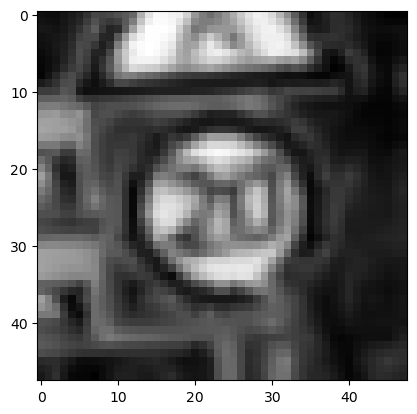

In [25]:
original_image = xtrain.iloc[0].values.reshape(48, 48)
plt.imshow(original_image, cmap='gray')

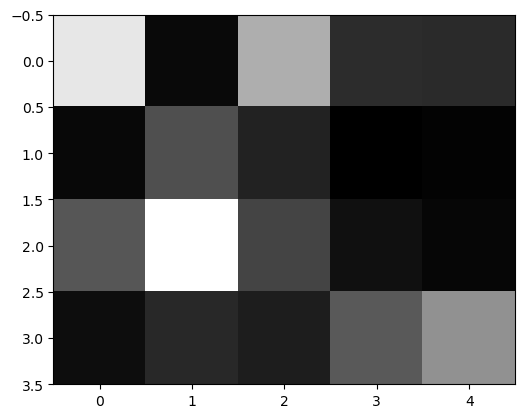

In [26]:
new = xy0_20.drop(columns=["label"])

original_image = new.iloc[0].values.reshape(4, 5)
plt.imshow(original_image, cmap='gray')

In [27]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB())

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.17784657722738217
F1 Score: 0.1436398047200998
Precision: 0.34542132352513194
Recall/Sensitivity/True Positive Rate: 0.17784657722738217


In [ ]:
from sklearn.multiclass import OneVsOneClassifier
classifiers = [GaussianNB() for i in range(5)]
ovr = OneVsOneClassifier(GaussianNB(), n_jobs=45)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
# predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



c:\Users\victo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4757481940144479
F1 Score: 0.46517680193532784
Precision: 0.5257300207272383
Recall/Sensitivity/True Positive Rate: 0.4757481940144479


In [ ]:
for x in [5, 10, 20]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        print(strings)
        print("The current Data frame is: ",i)
        y_train=strings['label']
        processed_df=strings.drop(columns=['label'])
        naive_bayes_search(processed_df,y_train)
        print("\n")

       1605    490   1536    927    742  label
0     219.0   83.0  184.0  105.0  103.0      0
1     185.0   97.0  187.0   80.0  123.0      0
2     204.0  129.0  182.0  110.0  196.0      0
3     185.0  148.0  184.0  135.0  235.0      0
4     175.0   80.0  107.0   81.0   78.0      0
...     ...    ...    ...    ...    ...    ...
9685   54.0  255.0  222.0  161.0   96.0      1
9686   55.0  255.0   92.0  104.0  104.0      1
9687   53.0  254.0  109.0   75.0  101.0      1
9688   53.0  255.0  113.0   86.0   94.0      1
9689   41.0  248.0  255.0   70.0   91.0      1

[9690 rows x 6 columns]
The current Data frame is:  0
Accuracy: 0.977640178878569
F1 Score: 0.9886936858584103
Precision: 0.9781401404791514
Recall/Sensitivity/True Positive Rate: 0.977640178878569
Confusion Matrix:
 [[   0    0]
 [  65 2842]]


       1432     52   1733    637   1262  label
0      89.0   89.0   94.0  115.0  176.0      1
1      91.0   79.0  111.0  110.0  100.0      1
2      87.0   88.0  120.0  119.0  153.0      1
3

In [ ]:
gnbs = []

# for x in [5, 10, 20]:
for x in [5]:
    for i in range(10):
        strings=globals()["xy{}_{}".format(i, x)]
        # print("The current Data frame is: ",i)
        y_train=strings['label']
        y_train = y_train.replace({0: i, 1: -1})
        print(y_train)
        processed_df=strings.drop(columns=['label'])
        # naive_bayes_search(processed_df,y_train)
        X_train, X_test, Y_train, Y_test = train_test_split(processed_df, y_train, test_size=0.3,random_state=seed_value)
        gnb = GaussianNB()
        gnb.fit(X_train, Y_train)
        gnbs.append(gnb)

predis = []
for gnb in gnbs:
    gnb.classes_
    predi = gnb.predict(X_test)
    predis.append(predi)

y_pred_multilabel = np.column_stack(predis)
accuracy_score(Y_test, y_pred_multilabel)

0       0
1       0
2       0
3       0
4       0
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1
9689   -1
Name: label, Length: 9690, dtype: int64
0      -1
1      -1
2      -1
3      -1
4      -1
       ..
9685   -1
9686   -1
9687   -1
9688   -1


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 1016
- 109
- 1136
- 1141
- 1265
- ...
Feature names seen at fit time, yet now missing:
- 1599
- 595
- 76
- 908
- 916


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
classifiers = [GaussianNB() for i in range(10)]
ovr = OneVsRestClassifier(GaussianNB(), n_jobs=10)

X_train, X_test, Y_train, Y_test = train_test_split(reduced_x_train, ytrainall, test_size=0.3,random_state=seed_value)

ovr.fit(X_train, Y_train)
predicted = ovr.predict(X_test)
predicted_probs = ovr.predict_proba(X_test)

# cross_val_scores = cross_val_score(gnb, X_train, Y_train, cv=5)  
# print("Cross-Validation Scores:", cross_val_scores)
# print("Mean CV Score:", cross_val_scores.mean())


# train_sizes, train_scores, test_scores = learning_curve(gnb, X_train, Y_train, cv=5)
# train_scores_mean = np.mean(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)

# plt.figure()
# plt.title("Learning Curves")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# plt.show()

accuracy = accuracy_score(Y_test,predicted )
f1 = f1_score(predicted, Y_test, average="weighted")
conf_matrix = confusion_matrix(predicted, Y_test)
precision = precision_score(Y_test, predicted, average="weighted",zero_division=1)
recall = recall_score(Y_test, predicted, average="weighted")
# roc = roc_auc_score(Y_test, predicted_probs, multi_class="ovr", average="weighted")
# conf_matrices = multilabel_confusion_matrix(Y_test, predicted)
# tp = conf_matrices[:,1,1]
# fp = conf_matrices[:,0,1]
# tn = conf_matrices[:,0,0]
# fn = conf_matrices[:,1,0]
# fpr = _nanaverage(fp/(tn + fp), tp + fn)
# tnr = _nanaverage(tn/(tn + fp), tp + fn)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall/Sensitivity/True Positive Rate:", recall)
# print("Specificity:", tnr)
# print("False Positive Rate:", fpr)
# print("Area under ROC curve:", roc)
# print("Confusion Matrix:\n", conf_matrix)



NameError: name 'reduced_x_train' is not defined

In [ ]:
"xy{}_{}".format(3, 4)

'xy3_4'